In [1]:
import json
import time
from base64 import b64decode
from io import BytesIO, StringIO
from IPython import get_ipython
from IPython.core.magic import register_cell_magic
from IPython.utils.capture import capture_output
from IPython.core.interactiveshell import InteractiveShell

from manim import *
params = f" -v WARNING -r {80*4},{40*4} -s  --disable_caching Example"
import PIL

cell_counter = 0

@register_cell_magic
def capture_png(line, cell):
    global cell_counter
    cell_counter += 1
    # init capturing cell output
    get_ipython().run_cell_magic(
        'capture',
        ' --no-stderr --no-stdout result',
        cell
    )
    argument_array = line.split('--style')
    post_path = argument_array[0].strip()
    chapter_name_underscore = chapter_name.replace(" ", "_")

    path = f"gallery_assets/{chapter_name_underscore}_{cell_counter:03}_{post_path}"

  #  path = path.split(".png")[0] + str(time.time_ns()) + ".png" time stemps not needed
    if not path:
        raise ValueError('No path found!')

    style = str(*argument_array[1:])
    style = style.strip()
    style = style.strip('"')  # remove quotes

    default_style = ""

    style = default_style + style

    raw_code_block = cell
    code_block = ""

    for codeline in StringIO(raw_code_block):
        if "#NOT" in codeline:
            pass
        else:
            code_block += codeline
    
    new_codeblock = ""
    for codeline in StringIO(code_block):
        if "#ONLY" in codeline:
            codeline= codeline.replace("#ONLY", "") 
            if codeline.startswith("        "): # delete the indention for manim -> TODO this can be made prettier!
                codeline = codeline[8:]

            new_codeblock += codeline
        else:
            pass
    
    if new_codeblock: # checks if there are lines that include "#ONLY"
        code_block = new_codeblock

    code_block = code_block.replace("'", "&#39;") # make sure that javascript can read the single quote character
    code_block = code_block.strip("\n")

    with open(joson_file_path, "r") as jsonFile:
            data = json.load(jsonFile)

    if not chapter_name in data:
        data[chapter_name] = []

    chapter_content = data[chapter_name]
    chapter_content.append(
        {"image_path": path,
        "celltype": "Normal",
        "css": style,
        "code": code_block})

    data[chapter_name] = chapter_content
    with open(joson_file_path, "w") as jsonFile:
        json.dump(data, jsonFile, indent=2, sort_keys=False)

    shell = InteractiveShell.instance()
    # save the output
    with capture_output(stdout=False, stderr=False, display=True) as result:
        shell.run_cell(cell) # idea by @krassowski 

    # save image
    for output in result.outputs:
        display(output)
        data = output.data
        if 'image/png' in data:
            png_bytes = data['image/png']
            if isinstance(png_bytes, str):
                png_bytes = b64decode(png_bytes)
            assert isinstance(png_bytes, bytes)
            bytes_io = BytesIO(png_bytes)
            image = PIL.Image.open(bytes_io)
            image.save(path, 'png')

joson_file_path = "gallery_assets/gallery_parameters.json"
chapter_name = "Text"


Manim Community v0.14.0

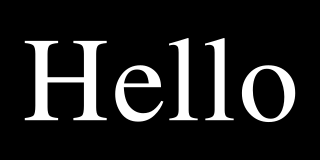

In [2]:
%%capture_png Text1.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Text("Hello", color=WHITE) #ONLY
        self.add(mob)
        self.camera.frame.scale(1/8)

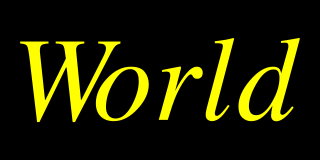

In [3]:
%%capture_png Text2.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Text("World", color=YELLOW,slant=ITALIC) #ONLY
        self.add(mob)
        self.camera.frame.scale(1/8)

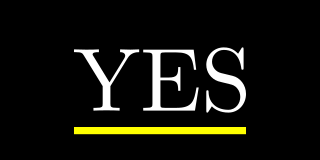

In [4]:
%%capture_png Underline.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        t = Tex("YES") #ONLY
        ul = Underline(t, color=YELLOW) #ONLY
        self.add(t, ul)
        self.camera.frame.scale(1/8)

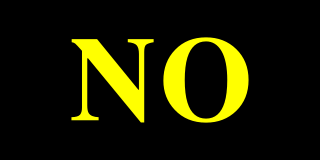

In [5]:
%%capture_png Bold.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Text("NO", color=YELLOW,weight=BOLD)  #ONLY
        self.add(mob)
        self.camera.frame.scale(1/8)

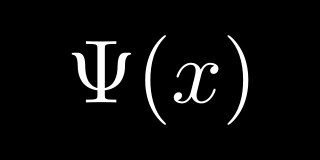

In [6]:
%%capture_png MathTex.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = MathTex(r"\Psi(x)", color=WHITE)  #ONLY
        self.add(mob)
        self.camera.frame.scale(1/8)

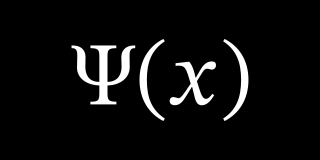

In [7]:
%%capture_png MathTex_stix2.png
%%manim $params

class Example(ZoomedScene):
    def construct(self): 
        stix2 = TexTemplate()  #ONLY
        stix2.add_to_preamble(r"\usepackage{stix2}", prepend= True)  #ONLY
        MathTex.set_default(tex_template=stix2)  #ONLY
        mob = MathTex(r"\Psi(x)", color=WHITE)  #ONLY
        self.add(mob)
        self.camera.frame.scale(1/8)

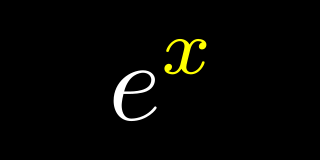

In [8]:
%%capture_png MathTex2.png
%%manim $params
MathTex.set_default()
class Example(ZoomedScene):
    def construct(self):
        mob = MathTex(r"e^x",substrings_to_isolate="x") #ONLY
        mob.set_color_by_tex("x", YELLOW) #ONLY
        self.add(mob)
        self.camera.frame.scale(1/10)

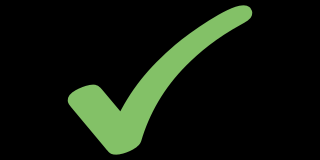

In [9]:
%%capture_png Check.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        check= Tex(r"\checkmark", color= GREEN, stroke_width=8).scale(3) #ONLY
        check.stretch(0.8, dim = 1) #ONLY
        check.stretch(1.1, dim = 0) #ONLY
        self.camera.frame.scale(1/7)
        self.add(check)
image_full_name = "Check.png"